In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score as R2
from sklearn.metrics import mean_squared_error as MSE

In [2]:
data = pd.read_csv('/Volumes/Database/Research/C7 Multivariate analysis/EC-Earth3-AerChem_diag_2014(0318).csv')

In [3]:
country = pd.read_csv('/Users/csuen/Desktop/PhD/Maps/country_province_state_2*2.csv')
data = data.merge(country, how = 'left', left_on = ['longitude','latitude'], right_on = ['longitude','latitude'])
data = data.drop(['province','state'], axis=1)

### First, converse the concentrations in ppb to molecules cm${^{-3}}$

In [4]:
data['o3_mole'] = data['o3']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['no_mole'] = data['no']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['no2_mole'] = data['no2']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['oh_mole'] = data['oh']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['h2o_mole'] = data['h2o']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['hno3_mole'] = data['hno3']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['pan_mole'] = data['pan']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)

data['k_ho2_ho2'] = 3.5*10**(-13)*np.exp(430/data['tas'])
data['k_oh_no2'] = 6.5*10**(-11)
data['k_o1d_h2o'] = 1.63*10**(-10)*np.exp(60/data['tas'])

data['o3prod_mole'] = data['o3prod']*6.022*10**17
data['o3loss_mole'] = data['o3loss']*6.022*10**17

data['lossch4_mole'] = data['lossch4']*6.022*10**17
data['lossco_mole'] = data['lossco']*6.022*10**17
data['k_ch3o2_ch3o2'] = 9.5*10**(-14)*np.exp(390/data['tas'])

In [5]:
data['k_no_ho2'].median()

8.420486867427826e-12

In [6]:
data['k_no_ch3o2'].median()

8.02936201095581e-12

In [7]:
data['k_o3_oh'].median()

6.264362223446369e-14

In [8]:
data['k_o3_ho2'].median()

1.7894203960895535e-15

In [9]:
data['k_ch3o2_ch3o2'].median()

3.736831334878286e-13

In [10]:
data['a'] = 2*data['k_ho2_ho2']
data['b'] = data['k_o3_ho2']*data['o3_mole'] + data['k_no_ho2']*data['no_mole']
data['c'] = -data['lossco_mole'] - data['k_o3_oh']*data['o3_mole']*data['oh_mole']

In [11]:
data['ho2_mole'] = (-data['b'] + np.sqrt(data['b']**2 - 4*data['a']*data['c']))/(2*data['a'])

In [12]:
data['ho2_mole'].describe()

count    1.944000e+05
mean     1.084023e+08
std      1.154069e+08
min      8.447393e+03
25%      1.477040e+07
50%      6.176843e+07
75%      1.827082e+08
max      5.645186e+08
Name: ho2_mole, dtype: float64

In [13]:
data['oh_mole'].describe()

count    1.944000e+05
mean     1.013119e+06
std      1.043842e+06
min      3.625931e+01
25%      1.484290e+05
50%      6.396672e+05
75%      1.717572e+06
max      1.227739e+07
Name: oh_mole, dtype: float64

In [14]:
data['ratio_ho2_oh'] = data['ho2_mole']/data['oh_mole']
data['ratio_ho2_oh'].describe()

count    194400.000000
mean        161.575753
std         121.147459
min           0.293992
25%          82.394704
50%         148.852917
75%         206.457155
max         900.845539
Name: ratio_ho2_oh, dtype: float64

In [15]:
data['P1'] = data['k_no_ho2']*data['no_mole']*data['ho2_mole']
data['P1_frac'] = data['P1']/data['o3prod_mole']
data['P1_frac'].describe()

count    194400.000000
mean          0.296950
std           0.180082
min           0.001834
25%           0.136896
50%           0.332109
75%           0.414332
max           0.893188
Name: P1_frac, dtype: float64

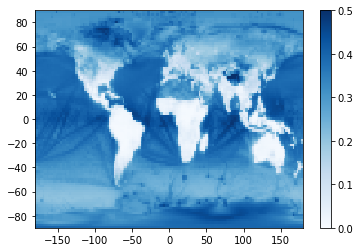

In [16]:
data['loc'] = data['longitude']*1000 + data['latitude']
data_land = data
#data_land = data_land[data_land['latitude'] >= -60]
#data_land = data_land[data_land['P1_frac'] <1]
data_mean = data_land.groupby(['loc']).mean()

cm = plt.cm.get_cmap('Blues')
x = data_mean['longitude']
y = data_mean['latitude']
z = data_mean['P1_frac']
sc = plt.scatter(x, y, c=z, marker="s", vmin=0, vmax=0.5, s=3, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.colorbar(sc)
plt.show()

In [17]:
data_mean['P1_frac'].describe()

count    16200.000000
mean         0.296950
std          0.109538
min          0.005283
25%          0.250126
50%          0.314551
75%          0.383249
max          0.600531
Name: P1_frac, dtype: float64

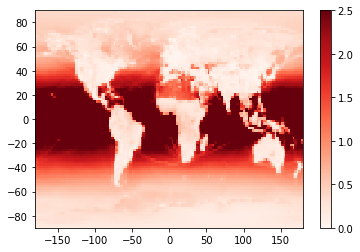

In [18]:
data['loc'] = data['longitude']*1000 + data['latitude']
data_land = data
#data_land = data_land[data_land['latitude'] >= -60]
data_mean = data_land.groupby(['loc']).mean()

cm = plt.cm.get_cmap('Reds')
x = data_mean['longitude']
y = data_mean['latitude']
z = data_mean['ho2_mole']*10**(-8)
sc = plt.scatter(x, y, c=z, marker="s", vmin=0, vmax=2.5, s=3, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.colorbar(sc)
plt.show()

In [19]:
data = data.drop(['a','b','c'], axis=1)
data

,longitude,latitude,t,loc,o3,o3loss,o3prod,eminox,emivoc,tas,...,k_oh_no2,o3prod_mole,o3loss_mole,lossch4_mole,lossco_mole,k_ch3o2_ch3o2,ho2_mole,ratio_ho2_oh,P1,P1_frac
0,1.0,-89.0,1.0,911.0,1.918366e-08,5.820803e-14,7.145326e-14,0.000000e+00,0.000000e+00,248.75261,...,6.500000e-11,43029.153172,35052.875666,19090.079641,59857.144390,4.556385e-13,4.002378e+07,104.854091,30336.447400,0.705021
1,3.0,-89.0,1.0,2911.0,1.918366e-08,5.820803e-14,7.145326e-14,0.000000e+00,0.000000e+00,248.71443,...,6.500000e-11,43029.153172,35052.875666,19090.079641,59857.144390,4.557481e-13,4.003072e+07,104.587795,30351.041773,0.705360
2,5.0,-89.0,1.0,4911.0,1.918151e-08,5.803789e-14,7.134267e-14,0.000000e+00,0.000000e+00,248.67625,...,6.500000e-11,42962.555874,34950.417358,19058.552062,59721.348290,4.558579e-13,3.993996e+07,104.111157,30336.870359,0.706124
3,7.0,-89.0,1.0,6911.0,1.917528e-08,5.749123e-14,7.101957e-14,0.000000e+00,0.000000e+00,248.63808,...,6.500000e-11,42767.985054,34621.218706,18891.328348,59424.310129,4.559676e-13,3.976680e+07,103.656067,30238.101534,0.707027
4,9.0,-89.0,1.0,8911.0,1.917528e-08,5.749123e-14,7.101957e-14,0.000000e+00,0.000000e+00,248.59988,...,6.500000e-11,42767.985054,34621.218706,18891.328348,59424.310129,4.560775e-13,3.976914e+07,103.486795,30249.205987,0.707286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194395,-9.0,89.0,12.0,-8911.0,2.716963e-08,1.193308e-14,6.409461e-16,9.685218e-14,7.394706e-15,246.50143,...,6.500000e-11,385.977741,7186.103787,67.746013,439.141884,4.622093e-13,3.651063e+05,596.518468,52.591996,0.136257
194396,-7.0,89.0,12.0,-6911.0,2.717685e-08,1.164388e-14,5.783149e-16,8.234587e-14,6.287143e-15,246.50337,...,6.500000e-11,348.261233,7011.942428,65.885216,424.592654,4.622035e-13,3.592314e+05,590.990220,44.338633,0.127314
194397,-5.0,89.0,12.0,-4911.0,2.719129e-08,6.036053e-15,1.296579e-22,0.000000e+00,0.000000e+00,246.50531,...,6.500000e-11,0.000078,3634.911297,64.693804,412.004374,4.621978e-13,3.876005e+05,637.594052,0.000001,0.018232
194398,-3.0,89.0,12.0,-2911.0,2.719129e-08,6.036053e-15,1.296579e-22,0.000000e+00,0.000000e+00,246.50725,...,6.500000e-11,0.000078,3634.911297,64.693804,412.004374,4.621920e-13,3.878770e+05,627.502230,0.000001,0.018245


In [20]:
data.to_csv('/Volumes/Database/Research/C7 Multivariate analysis/EC-Earth3-AerChem_diag_2014(0319).csv', index = False)